In [22]:
#powoduje że wszystkie rysunki będą tworzone poniżej tego notebooka 
%matplotlib inline 

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
plt.style.use("fivethirtyeight")

In [14]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [18]:
print(pd.DataFrame(mnist.data))

       0    1    2    3    4    5    6    7    8    9   ...   774  775  776  \
0        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
1        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
2        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
3        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
4        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
5        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
6        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
7        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
8        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
9        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
10       0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
11       0    0    0    0    0    0    0    0    0  

In [20]:
from IPython.display import display
pd.set_option('display.max_columns', 30)
digit = mnist.data[0,:].reshape(28,28)
display(pd.DataFrame(digit))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0


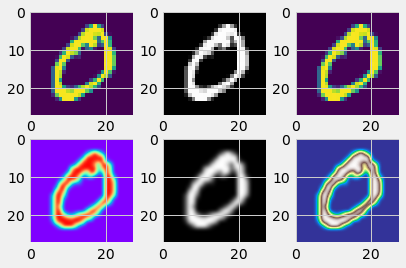

In [25]:
plt.subplot(2, 3, 1)
plt.imshow(digit)

plt.subplot(2, 3, 2)
plt.imshow(digit, cmap="gray")

plt.subplot(2, 3, 3)
plt.imshow(digit)

plt.subplot(2, 3, 4)
plt.imshow(digit, cmap="rainbow", interpolation="bicubic")

plt.subplot(2, 3, 5)
plt.imshow(digit, cmap="gray", interpolation="bicubic")

plt.subplot(2, 3, 6)
plt.imshow(digit, cmap="terrain", interpolation="bicubic")
def random_directions(seed):

    # tworzymy deterministyczny generator liczb losowych
    rng = np.random.RandomState(seed=seed)
    
    # losujemy dwa wektory, które odpowiadają kierunkom "patrzenia"
    # losowe wektory w 784 wymiarach są prawie prostopadłe
    v = rng.normal(size=784)
    v = v / np.linalg.norm(v)
    w = rng.normal(size=784)
    w = w / np.linalg.norm(w)

    return v, w

def project_mnist(v, w):

    # konwertujemy cyfry do floatów, normalizujemy piksele do przedziału [0., 1.]
    digits = mnist.data.astype(np.float32) / 255.

    # pierwsza współrzędna
    x = np.dot(mnist.data, v)
    # druga współrzędna
    y = np.dot(mnist.data, w)

    return x, y

def draw_mnist(x, y):

    # losujemy kolory
    rng_colors = np.random.RandomState(43)
    colors = list([rng_colors.rand(3) for _ in range(10)])
    markers = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3']

    # tu będziemy trzymać wykresy
    plots = []

    # trzymamy etykiety jako inty od 0 do 9
    labels = mnist.target.astype(np.int8)

    # normalizujemy dwie skale wykresu
    plt.figure()
    ax = plt.subplot()
    ax.axis("equal")

    # rysujemy cyfry grupami
    for label in range(10):
        _x = x[np.where(labels==label)[0]]
        _y = y[np.where(labels==label)[0]]
        plots.append(
            ax.scatter(_x, _y, c=colors[label], marker=markers[label], alpha=0.5, s=70))

    # dodajemy legendę
    _ = ax.legend(plots,
               [str(label) for label in range(10)],
               loc='lower left',
               ncol=5,
               fontsize=8)

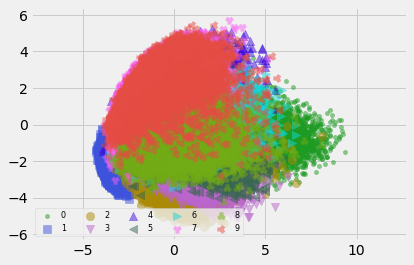

In [27]:
from sklearn.decomposition import PCA

digits = mnist.data.astype(np.float32) / 255.
transformed = PCA(n_components=3).fit_transform(digits)
x, y = transformed[:,0], transformed[:,1]
draw_mnist(x, y)

In [28]:
from sklearn.svm import LinearSVC
import tqdm

digits = mnist.data.astype(np.float32) / 255.
directions = []

# uczenie trochę potrwa, użyjmy tqdm
for label in tqdm.tqdm(list(range(10))):
    # "labels" przechowuje etykiety cyfr
    labels = mnist.target.astype(np.int64)
    # wybrana cyfra przechowywana jest w zmiennej "label"
    first_class = (labels==label)
    second_class = (labels!=label)
    # chcemy, żeby "labels" reprezentowało podział na 2 klasy: cyfra "label" i reszta
    labels[first_class] = 1
    labels[second_class] = 0
    # trenujemy model
    svc = LinearSVC(random_state=43, class_weight="balanced", max_iter=100)
    svc.fit(digits, labels)
    # wyciągamy interesujący nas kierunek
    directions.append(svc.coef_.ravel())

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.01s/it]


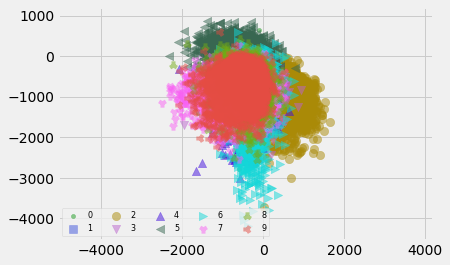

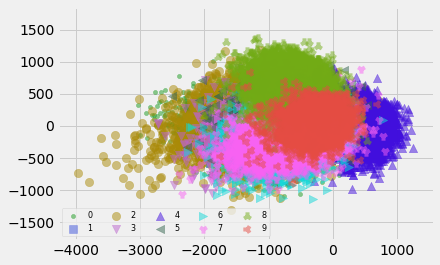

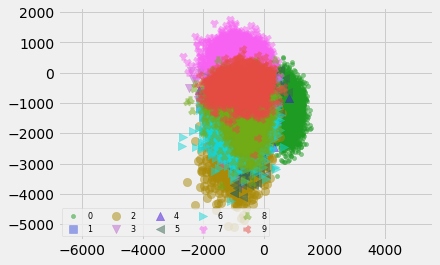

In [29]:
x, y = project_mnist(directions[2], directions[5])
draw_mnist(x, y)

x, y = project_mnist(directions[4], directions[8])
draw_mnist(x, y)

x, y = project_mnist(directions[0], directions[7])
draw_mnist(x, y)